# Introduction to `pandas`

:::{note}
This material is mostly adapted from the following resources:
- [Earth and Environmental Data Science: Pandas](https://earth-env-data-science.github.io/lectures/pandas/pandas_intro.html)
- [Python Programming for Data Science: Pandas](https://www.tomasbeuzen.com/python-programming-for-data-science/chapters/chapter7-pandas.html)
:::

<img src="https://pandas.pydata.org/static/img/pandas.svg" width="300px" />

[Pandas](http://pandas.pydata.org/) is a an open source library providing high-performance, easy-to-use data structures and data analysis tools. Pandas is particularly suited to the analysis of _tabular_ data, i.e. data that can can go into a table. In other words, if you can imagine the data in an Excel spreadsheet, then Pandas is the tool for the job.

- A fast and efficient DataFrame object for data manipulation with indexing;
- Tools for reading and writing data: CSV and text files, Excel, SQL;
- Intelligent data alignment and integrated handling of missing data;
- Flexible reshaping and pivoting of data sets;
- Intelligent label-based slicing, indexing, and subsetting of large data sets;
- High performance aggregating, merging, joining or transforming data;
- Hierarchical indexing provides an intuitive way of working with high-dimensional data;
- Time series-functionality: date-based indexing, frequency conversion, moving windows, date shifting and lagging;

<img src="https://media.geeksforgeeks.org/wp-content/cdn-uploads/creating_dataframe1.png" width="720px" />

:::{note}
Documentation for this package is available at https://pandas.pydata.org/docs/.
:::

:::{note}
If you have not yet set up Python on your computer, you can execute this tutorial in your browser via [Google Colab](https://colab.research.google.com/). Click on the rocket in the top right corner and launch "Colab". If that doesn't work download the `.ipynb` file and import it in [Google Colab](https://colab.research.google.com/).

Then install `pandas` and `numpy` by executing the following command in a Jupyter cell at the top of the notebook.

```sh
!pip install pandas numpy
```
:::

In [2]:
import pandas as pd
import numpy as np

## Pandas Data Structures: Series

A Series represents a one-dimensional array of data. The main difference between a Series and numpy array is that a Series has an **index**. The index contains the labels that we use to access the data.

There are many ways to [create a Series](https://pandas.pydata.org/pandas-docs/stable/dsintro.html#series). We will just show a few. The core constructor is [`pd.Series()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.html).

(Data are from Wikipedia's [List of power stations in Germany](https://en.wikipedia.org/wiki/List_of_power_stations_in_Germany#Nuclear).)

In [2]:
names = ["Neckarwestheim", "Isar 2", "Emsland"]
values = [1269, 1365, 1290]
s = pd.Series(values, index=names)
s

Neckarwestheim    1269
Isar 2            1365
Emsland           1290
dtype: int64

In [3]:
dictionary = {
    "Neckarwestheim": 1269,
    "Isar 2": 1365,
    "Emsland": 1290,
}
s = pd.Series(dictionary)
s

Neckarwestheim    1269
Isar 2            1365
Emsland           1290
dtype: int64

In [4]:
s.loc["Emsland"]

1290

In [5]:
type(s)

pandas.core.series.Series

Arithmetic operations and most `numpy` functions can be applied to `pd.Series`.
An important point is that the Series keep their index during such operations.

In [7]:
s

Neckarwestheim    1269
Isar 2            1365
Emsland           1290
dtype: int64

In [13]:
np.mean(s)

1308.0

In [16]:
np.log(s) / s**0.5

Neckarwestheim    0.200600
Isar 2            0.195391
Emsland           0.199418
dtype: float64

In [17]:
s * s

Neckarwestheim    1610361
Isar 2            1863225
Emsland           1664100
dtype: int64

In [4]:
np.log(s) / s**0.5

Neckarwestheim    0.200600
Isar 2            0.195391
Emsland           0.199418
dtype: float64

We can access the underlying index object if we need to:

In [18]:
s.index

Index(['Neckarwestheim', 'Isar 2', 'Emsland'], dtype='object')

We can get values back out using the index via the `.loc` attribute

In [26]:
s.loc["Isar 2"]

1365

Or by raw position using `.iloc`

In [27]:
s.iloc[2]

1290

We can pass a list or array to loc to get multiple rows back:

In [29]:
s.loc[["Neckarwestheim", "Emsland"]]

Neckarwestheim    1269
Emsland           1290
dtype: int64

And we can even use slice notation

In [31]:
s

Neckarwestheim    1269
Isar 2            1365
Emsland           1290
dtype: int64

In [34]:
s

Neckarwestheim    1269
Isar 2            1365
Emsland           1290
dtype: int64

In [30]:
s.loc["Neckarwestheim":"Emsland"]

Neckarwestheim    1269
Isar 2            1365
Emsland           1290
dtype: int64

In [35]:
s.iloc[:2]

Neckarwestheim    1269
Isar 2            1365
dtype: int64

If we need to, we can always get the raw data back out as well

In [36]:
s.values  # a numpy array

array([1269, 1365, 1290])

## Pandas Data Structures: DataFrame

There is a lot more to Series, but they are limit to a single **column**. A more useful Pandas data structure is the **DataFrame**. A DataFrame is basically a bunch of series that share the same index. It's a lot like a table in a spreadsheet.

The core constructor is `pd.DataFrame()`

Below we create a DataFrame.

In [158]:
# first we create a dictionary
data = {
    "capacity": [1269, 1365, 1290],  # MW
    "type": ["PWR", "PWR", "PWR"],
    "start_year": [1989, 1988, 1988],
    "end_year": [np.nan, np.nan, np.nan],
}

df = pd.DataFrame(data, index=["Neckarwestheim", "Isar 2", "Emsland"])
df

,capacity,type,start_year,end_year
Neckarwestheim,1269,PWR,1989,NaN
Isar 2,1365,PWR,1988,NaN
Emsland,1290,PWR,1988,NaN


In [76]:
# Going from index to column...
df["cities"] = df.index
df.reset_index(drop=True, inplace=True)

In [74]:
# Going from column to index...
df.index = df["cities"]
df = df.drop("cities", axis=1)
df


,capacity,type,start_year,end_year
cities,,,,
Neckarwestheim,1269,PWR,1989,NaN
Isar 2,1365,PWR,1988,NaN
Emsland,1290,PWR,1988,NaN


In [84]:
# Dropping rows = axis 0
# Dropping columns = axis 1


In [85]:
df

,capacity,type,start_year,end_year,cities
0,1269,PWR,1989,NaN,Neckarwestheim
1,1365,PWR,1988,NaN,Isar 2
2,1290,PWR,1988,NaN,Emsland


We can also switch columns and rows very easily.

In [86]:
df

,capacity,type,start_year,end_year,cities
0,1269,PWR,1989,NaN,Neckarwestheim
1,1365,PWR,1988,NaN,Isar 2
2,1290,PWR,1988,NaN,Emsland


In [87]:
df.T

,0,1,2
capacity,1269,1365,1290
type,PWR,PWR,PWR
start_year,1989,1988,1988
end_year,NaN,NaN,NaN
cities,Neckarwestheim,Isar 2,Emsland


A wide range of statistical functions are available on both Series and DataFrames.

In [89]:
df

,capacity,type,start_year,end_year,cities
0,1269,PWR,1989,NaN,Neckarwestheim
1,1365,PWR,1988,NaN,Isar 2
2,1290,PWR,1988,NaN,Emsland


In [88]:
df.min()

capacity         1269
type              PWR
start_year       1988
end_year          NaN
cities        Emsland
dtype: object

In [100]:
df.dtypes

capacity        int64
type           object
start_year      int64
end_year      float64
cities         object
dtype: object

In [101]:
df.mean(numeric_only=True)

capacity      1308.000000
start_year    1988.333333
end_year              NaN
dtype: float64

In [102]:
df.std(numeric_only=True)

capacity      50.467812
start_year     0.577350
end_year            NaN
dtype: float64

In [103]:
df.median(numeric_only=True)

capacity      1290.0
start_year    1988.0
end_year         NaN
dtype: float64

In [104]:
df.describe()

,capacity,start_year,end_year
count,3.000000,3.000000,0.0
mean,1308.000000,1988.333333,NaN
std,50.467812,0.577350,NaN
min,1269.000000,1988.000000,NaN
25%,1279.500000,1988.000000,NaN
50%,1290.000000,1988.000000,NaN
75%,1327.500000,1988.500000,NaN
max,1365.000000,1989.000000,NaN


We can get a single column as a Series using python's getitem syntax on the DataFrame object.

In [105]:
df["capacity"]

0    1269
1    1365
2    1290
Name: capacity, dtype: int64

In [108]:
df[["capacity", "type", "start_year"]]

,capacity,type,start_year
0,1269,PWR,1989
1,1365,PWR,1988
2,1290,PWR,1988


...or using attribute syntax.

In [109]:
df.capacity

0    1269
1    1365
2    1290
Name: capacity, dtype: int64

Indexing works very similar to series

In [112]:
df

,capacity,type,start_year,end_year
Neckarwestheim,1269,PWR,1989,NaN
Isar 2,1365,PWR,1988,NaN
Emsland,1290,PWR,1988,NaN


In [116]:
df.loc["Emsland"]

capacity      1290
type           PWR
start_year    1988
end_year       NaN
Name: Emsland, dtype: object

In [122]:
df["cities"] = df.index
df.reset_index(drop=True, inplace=True)
df

,capacity,type,start_year,end_year,cities
0,1269,PWR,1989,NaN,Neckarwestheim
1,1365,PWR,1988,NaN,Isar 2
2,1290,PWR,1988,NaN,Emsland


In [130]:
df.loc[0:1, ["type", "start_year", "end_year"]]

,type,start_year,end_year
0,PWR,1989,NaN
1,PWR,1988,NaN


In [120]:
df.loc["Emsland", "start_year"]

1988

In [117]:
df.loc["Emsland"]["start_year"]

1988

In [131]:
df.iloc[2]["start_year"]

1988

But we can also specify the column(s) and row(s) we want to access

In [133]:
df

,capacity,type,start_year,end_year
Neckarwestheim,1269,PWR,1989,NaN
Isar 2,1365,PWR,1988,NaN
Emsland,1290,PWR,1988,NaN


In [134]:
df.loc["Emsland", "start_year"]

1988

In [135]:
df.loc[["Emsland", "Neckarwestheim"], ["start_year", "end_year"]]

,start_year,end_year
Emsland,1988,NaN
Neckarwestheim,1989,NaN


In [136]:
df.capacity * 0.8

Neckarwestheim    1015.2
Isar 2            1092.0
Emsland           1032.0
Name: capacity, dtype: float64

Which we can easily add as another column to the DataFrame:

In [137]:
df

,capacity,type,start_year,end_year
Neckarwestheim,1269,PWR,1989,NaN
Isar 2,1365,PWR,1988,NaN
Emsland,1290,PWR,1988,NaN


In [140]:
df["reduced_capacity"] = df.capacity * 0.8
df

,capacity,type,start_year,end_year,reduced_capacity
Neckarwestheim,1269,PWR,1989,NaN,1015.2
Isar 2,1365,PWR,1988,NaN,1092.0
Emsland,1290,PWR,1988,NaN,1032.0


We can also remove columns or rows from a DataFrame:

In [142]:
df.drop("reduced_capacity", axis="columns")

,capacity,type,start_year,end_year
Neckarwestheim,1269,PWR,1989,NaN
Isar 2,1365,PWR,1988,NaN
Emsland,1290,PWR,1988,NaN


We can update the variable `df` by either overwriting `df` or passing an `inplace` keyword:

In [143]:
df.drop("reduced_capacity", axis="columns", inplace=True)

We can also drop columns with only NaN values

In [148]:
df.loc["Neckarwestheim", "end_year"] = 2023
df.loc["Isar 2", "end_year"] = 2023
df


,capacity,type,start_year,end_year
Neckarwestheim,1269,PWR,1989,2023.0
Isar 2,1365,PWR,1988,2023.0
Emsland,1290,PWR,1988,NaN


In [151]:
df.dropna(axis=1, how="any")

,capacity,type,start_year
Neckarwestheim,1269,PWR,1989
Isar 2,1365,PWR,1988
Emsland,1290,PWR,1988


In [150]:
df.dropna(axis=1, how="all")

,capacity,type,start_year,end_year
Neckarwestheim,1269,PWR,1989,2023.0
Isar 2,1365,PWR,1988,2023.0
Emsland,1290,PWR,1988,NaN


Or fill it up with default "fallback" data:

In [153]:
df.fillna(2023)

,capacity,type,start_year,end_year
Neckarwestheim,1269,PWR,1989,2023.0
Isar 2,1365,PWR,1988,2023.0
Emsland,1290,PWR,1988,2023.0


Say, we already have one value for `end_year` and want to fill up the missing data:

In [161]:
df.loc["Emsland", "end_year"] = 2023

In [162]:
df

,capacity,type,start_year,end_year
Neckarwestheim,1269,PWR,1989,NaN
Isar 2,1365,PWR,1988,NaN
Emsland,1290,PWR,1988,2023.0


In [164]:
# first we create a dictionary
data = {
    "capacity": [1269, 1365, 1290],  # MW
    "type": ["PWR", "PWR", "PWR"],
    "start_year": [1989, 1988, 1988],
    "end_year": [np.nan, np.nan, np.nan],
}

df = pd.DataFrame(data, index=["Neckarwestheim", "Isar 2", "Emsland"])
df

,capacity,type,start_year,end_year
Neckarwestheim,1269,PWR,1989,NaN
Isar 2,1365,PWR,1988,NaN
Emsland,1290,PWR,1988,NaN


In [165]:
df.loc["Isar 2", "end_year"] = 2023

In [166]:
df

,capacity,type,start_year,end_year
Neckarwestheim,1269,PWR,1989,NaN
Isar 2,1365,PWR,1988,2023.0
Emsland,1290,PWR,1988,NaN


In [168]:
# backward (upwards) fill from non-nan values
df.fillna(method="ffill")

/var/folders/2s/38kg81v526j7qcgd8gdq8jd00000gn/T/ipykernel_3309/3508584388.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill")


,capacity,type,start_year,end_year
Neckarwestheim,1269,PWR,1989,NaN
Isar 2,1365,PWR,1988,2023.0
Emsland,1290,PWR,1988,2023.0


## Sorting Data

We can also sort the entries in dataframes, e.g. alphabetically by index or numerically by column values

In [169]:
df.sort_index()

,capacity,type,start_year,end_year
Emsland,1290,PWR,1988,NaN
Isar 2,1365,PWR,1988,2023.0
Neckarwestheim,1269,PWR,1989,NaN


In [175]:
df.sort_values(by="capacity", ascending=False)

,capacity,type,start_year,end_year
Isar 2,1365,PWR,1988,2023.0
Emsland,1290,PWR,1988,NaN
Neckarwestheim,1269,PWR,1989,NaN


In [177]:
import seaborn as sns

data = sns.load_dataset("tips")
data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [179]:
data.sort_values("tip", ascending=False)

,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.00,Male,Yes,Sat,Dinner,3
212,48.33,9.00,Male,No,Sat,Dinner,4
23,39.42,7.58,Male,No,Sat,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4
141,34.30,6.70,Male,No,Thur,Lunch,6
...,...,...,...,...,...,...,...
0,16.99,1.01,Female,No,Sun,Dinner,2
236,12.60,1.00,Male,Yes,Sat,Dinner,2
111,7.25,1.00,Female,No,Sat,Dinner,1
67,3.07,1.00,Female,Yes,Sat,Dinner,1


In [180]:
data.sort_values("tip", ascending=False).iloc[0:5]

,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.00,Male,Yes,Sat,Dinner,3
212,48.33,9.00,Male,No,Sat,Dinner,4
23,39.42,7.58,Male,No,Sat,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4
141,34.30,6.70,Male,No,Thur,Lunch,6


In [182]:
data.sort_values("tip", ascending=False).iloc[0:5][["total_bill", "tip", "smoker"]]

,total_bill,tip,smoker
170,50.81,10.00,Yes
212,48.33,9.00,No
23,39.42,7.58,No
59,48.27,6.73,No
141,34.30,6.70,No


In [176]:
df.sort_values(by="capacity", ascending=False).iloc[0:2][["start_year", "end_year"]]

,start_year,end_year
Isar 2,1988,2023.0
Emsland,1988,NaN


In [183]:
data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [187]:
data.value_counts(["sex", "smoker"])

sex     smoker
Male    No        97
        Yes       60
Female  No        54
        Yes       33
Name: count, dtype: int64

If we make a calculation using columns from the DataFrame, it will keep the same index:

## Merging Data

Pandas supports a wide range of methods for merging different datasets. These are described extensively in the [documentation](https://pandas.pydata.org/pandas-docs/stable/merging.html). Here we just give a few examples.

In [44]:
data = {
    "capacity": [1288, 1360, 1326],  # MW
    "type": ["BWR", "PWR", "PWR"],
    "start_year": [1985, 1985, 1986],
    "end_year": [2021, 2021, 2021],
    "x": [10.40, 9.41, 9.35],
    "y": [48.51, 52.03, 53.85],
}
df2 = pd.DataFrame(data, index=["Gundremmingen", "Grohnde", "Brokdorf"])
df2

,capacity,type,start_year,end_year,x,y
Gundremmingen,1288,BWR,1985,2021,10.40,48.51
Grohnde,1360,PWR,1985,2021,9.41,52.03
Brokdorf,1326,PWR,1986,2021,9.35,53.85


In [189]:
df

,capacity,type,start_year,end_year
Neckarwestheim,1269,PWR,1989,NaN
Isar 2,1365,PWR,1988,2023.0
Emsland,1290,PWR,1988,NaN


In [190]:
pd.concat([df, df2])

,capacity,type,start_year,end_year,x,y
Neckarwestheim,1269,PWR,1989,NaN,NaN,NaN
Isar 2,1365,PWR,1988,2023.0,NaN,NaN
Emsland,1290,PWR,1988,NaN,NaN,NaN
Gundremmingen,1288,BWR,1985,2021.0,10.40,48.51
Grohnde,1360,PWR,1985,2021.0,9.41,52.03
Brokdorf,1326,PWR,1986,2021.0,9.35,53.85


We can now add this additional data to the `df` object

In [191]:
df = pd.concat([df, df2])

In [192]:
df

,capacity,type,start_year,end_year,x,y
Neckarwestheim,1269,PWR,1989,NaN,NaN,NaN
Isar 2,1365,PWR,1988,2023.0,NaN,NaN
Emsland,1290,PWR,1988,NaN,NaN,NaN
Gundremmingen,1288,BWR,1985,2021.0,10.40,48.51
Grohnde,1360,PWR,1985,2021.0,9.41,52.03
Brokdorf,1326,PWR,1986,2021.0,9.35,53.85


## Filtering Data

We can also filter a DataFrame using a boolean series obtained from a condition. This is very useful to build subsets of the DataFrame.

In [194]:
df.capacity > 1300

Neckarwestheim    False
Isar 2             True
Emsland           False
Gundremmingen     False
Grohnde            True
Brokdorf           True
Name: capacity, dtype: bool

In [193]:
df

,capacity,type,start_year,end_year,x,y
Neckarwestheim,1269,PWR,1989,NaN,NaN,NaN
Isar 2,1365,PWR,1988,2023.0,NaN,NaN
Emsland,1290,PWR,1988,NaN,NaN,NaN
Gundremmingen,1288,BWR,1985,2021.0,10.40,48.51
Grohnde,1360,PWR,1985,2021.0,9.41,52.03
Brokdorf,1326,PWR,1986,2021.0,9.35,53.85


In [195]:
df[df.capacity > 1300]

,capacity,type,start_year,end_year,x,y
Isar 2,1365,PWR,1988,2023.0,NaN,NaN
Grohnde,1360,PWR,1985,2021.0,9.41,52.03
Brokdorf,1326,PWR,1986,2021.0,9.35,53.85


In [203]:
df[df["capacity"] > 1300].sort_values("start_year", ascending=False).iloc[:1]["type"]

Isar 2    PWR
Name: type, dtype: object

We can also combine multiple conditions, but we need to wrap the conditions with brackets!

In [200]:
df[(df.capacity > 1300) | (df.start_year >= 1988)]

,capacity,type,start_year,end_year,x,y
Neckarwestheim,1269,PWR,1989,NaN,NaN,NaN
Isar 2,1365,PWR,1988,2023.0,NaN,NaN
Emsland,1290,PWR,1988,NaN,NaN,NaN
Grohnde,1360,PWR,1985,2021.0,9.41,52.03
Brokdorf,1326,PWR,1986,2021.0,9.35,53.85


Or we make [SQL-like](https://en.wikipedia.org/wiki/SQL) queries:

In [204]:
df.query("start_year == 1988")

,capacity,type,start_year,end_year,x,y
Isar 2,1365,PWR,1988,2023.0,NaN,NaN
Emsland,1290,PWR,1988,NaN,NaN,NaN


In [205]:
threshold = 1300
df.query("start_year == 1988 and capacity > @threshold")

,capacity,type,start_year,end_year,x,y
Isar 2,1365,PWR,1988,2023.0,NaN,NaN


## Modifying Values

In many cases, we want to modify values in a dataframe based on some rule. To modify values, we need to use `.loc` or `.iloc`

In [206]:
df

,capacity,type,start_year,end_year,x,y
Neckarwestheim,1269,PWR,1989,NaN,NaN,NaN
Isar 2,1365,PWR,1988,2023.0,NaN,NaN
Emsland,1290,PWR,1988,NaN,NaN,NaN
Gundremmingen,1288,BWR,1985,2021.0,10.40,48.51
Grohnde,1360,PWR,1985,2021.0,9.41,52.03
Brokdorf,1326,PWR,1986,2021.0,9.35,53.85


In [207]:
df.loc["Isar 2", "x"] = 12.29
df.loc["Grohnde", "capacity"] += 1
df

,capacity,type,start_year,end_year,x,y
Neckarwestheim,1269,PWR,1989,NaN,NaN,NaN
Isar 2,1365,PWR,1988,2023.0,12.29,NaN
Emsland,1290,PWR,1988,NaN,NaN,NaN
Gundremmingen,1288,BWR,1985,2021.0,10.40,48.51
Grohnde,1361,PWR,1985,2021.0,9.41,52.03
Brokdorf,1326,PWR,1986,2021.0,9.35,53.85


In [34]:
table_a = pd.DataFrame(
    {
        "column1": [1,2,3],
        "names": ["Nick", "Christine", "Guillem"]
    }
)

table_b = pd.DataFrame(
    {
        "column2": [10,20],
        "names": ["Bob", "Alex"]
    }
)

In [35]:
table_a

,column1,names
0,1,Nick
1,2,Christine
2,3,Guillem


In [36]:
table_b

,column2,names
0,10,Bob
1,20,Alex


In [33]:
pd.merge(table_a, table_b, on="names", how="right")

,column1,names,column2
0,1,Nick,10
1,2,Christine,20


In [37]:
pd.concat([table_a, table_b])

,column1,names,column2
0,1.0,Nick,NaN
1,2.0,Christine,NaN
2,3.0,Guillem,NaN
0,NaN,Bob,10.0
1,NaN,Alex,20.0


In [208]:
operational = ["Neckarwestheim", "Isar 2", "Emsland"]
df.loc[operational, "y"] = [49.04, 48.61, 52.47]
df

,capacity,type,start_year,end_year,x,y
Neckarwestheim,1269,PWR,1989,NaN,NaN,49.04
Isar 2,1365,PWR,1988,2023.0,12.29,48.61
Emsland,1290,PWR,1988,NaN,NaN,52.47
Gundremmingen,1288,BWR,1985,2021.0,10.40,48.51
Grohnde,1361,PWR,1985,2021.0,9.41,52.03
Brokdorf,1326,PWR,1986,2021.0,9.35,53.85


## Applying Functions

Sometimes it can be useful apply a function to all values of a column/row. For instance, we might be interested in normalised capacities relative to the largest nuclear power plant:

In [209]:
some_list = [1,2,3,4,5,6]


In [ ]:
lambda

In [210]:
df

,capacity,type,start_year,end_year,x,y
Neckarwestheim,1269,PWR,1989,NaN,NaN,49.04
Isar 2,1365,PWR,1988,2023.0,12.29,48.61
Emsland,1290,PWR,1988,NaN,NaN,52.47
Gundremmingen,1288,BWR,1985,2021.0,10.40,48.51
Grohnde,1361,PWR,1985,2021.0,9.41,52.03
Brokdorf,1326,PWR,1986,2021.0,9.35,53.85


In [215]:
for idx, row in df.iterrows():
    some_capacity = row["capacity"]
    df.loc[idx, "capacity"] = some_capacity + 10

In [217]:
df["capacity"] += 10

In [38]:
df.Capacity

id
0       2911.000000
1        189.200000
2        152.000000
3        159.000000
4        141.000000
           ...     
6563       0.000000
6564     732.939880
6565      68.223335
6566     142.931681
6567      40.574155
Name: Capacity, Length: 6279, dtype: float64

In [41]:
some_function = lambda i, j: i + j

In [42]:
some_function(10, 20)

30

In [214]:
df.capacity.apply(lambda some_capacity: some_capacity + 10)

Neckarwestheim    1279
Isar 2            1375
Emsland           1300
Gundremmingen     1298
Grohnde           1371
Brokdorf          1336
Name: capacity, dtype: int64

In [218]:
df

,capacity,type,start_year,end_year,x,y
Neckarwestheim,1289,PWR,1989,NaN,NaN,49.04
Isar 2,1385,PWR,1988,2023.0,12.29,48.61
Emsland,1310,PWR,1988,NaN,NaN,52.47
Gundremmingen,1308,BWR,1985,2021.0,10.40,48.51
Grohnde,1381,PWR,1985,2021.0,9.41,52.03
Brokdorf,1346,PWR,1986,2021.0,9.35,53.85


In [211]:
df.capacity.apply(lambda x: x / df.capacity.max())

Neckarwestheim    0.929670
Isar 2            1.000000
Emsland           0.945055
Gundremmingen     0.943590
Grohnde           0.997070
Brokdorf          0.971429
Name: capacity, dtype: float64

In [219]:
some_function_that_adds_two_ints = lambda x, y: x + y

In [220]:
some_function_that_adds_two_ints(10, 50)

60

In [ ]:
df.capacity.map(lambda x: x / df.capacity.max())

For simple functions, there's often an easier alternative:

In [221]:
df.capacity / df.capacity.max()

Neckarwestheim    0.930686
Isar 2            1.000000
Emsland           0.945848
Gundremmingen     0.944404
Grohnde           0.997112
Brokdorf          0.971841
Name: capacity, dtype: float64

But `.apply()` and `.map()` often give you more flexibility.

## Renaming Indices and Columns

Sometimes it can be useful to rename columns:

In [222]:
df.rename(columns=dict(x="lat", y="lon"))

,capacity,type,start_year,end_year,lat,lon
Neckarwestheim,1289,PWR,1989,NaN,NaN,49.04
Isar 2,1385,PWR,1988,2023.0,12.29,48.61
Emsland,1310,PWR,1988,NaN,NaN,52.47
Gundremmingen,1308,BWR,1985,2021.0,10.40,48.51
Grohnde,1381,PWR,1985,2021.0,9.41,52.03
Brokdorf,1346,PWR,1986,2021.0,9.35,53.85


In [225]:
df

,capacity,type,start_year,end_year,x,y
Neckarwestheim,1289,PWR,1989,NaN,NaN,49.04
Isar 2,1385,PWR,1988,2023.0,12.29,48.61
Emsland,1310,PWR,1988,NaN,NaN,52.47
Gundremmingen,1308,BWR,1985,2021.0,10.40,48.51
Grohnde,1381,PWR,1985,2021.0,9.41,52.03
Brokdorf,1346,PWR,1986,2021.0,9.35,53.85


In [224]:
df.rename(
    columns = {
        "x": "latitude",
        "y": "longitude"
    }
)

,capacity,type,start_year,end_year,latitude,longitude
Neckarwestheim,1289,PWR,1989,NaN,NaN,49.04
Isar 2,1385,PWR,1988,2023.0,12.29,48.61
Emsland,1310,PWR,1988,NaN,NaN,52.47
Gundremmingen,1308,BWR,1985,2021.0,10.40,48.51
Grohnde,1381,PWR,1985,2021.0,9.41,52.03
Brokdorf,1346,PWR,1986,2021.0,9.35,53.85


## Replacing Values

Sometimes it can be useful to replace values:

In [227]:
df.replace(
    {
        "PWR": "Pressurized water reactor",
        "BWR": "Something Nick doesn't know"
    }
)

,capacity,type,start_year,end_year,x,y
Neckarwestheim,1289,Pressurized water reactor,1989,NaN,NaN,49.04
Isar 2,1385,Pressurized water reactor,1988,2023.0,12.29,48.61
Emsland,1310,Pressurized water reactor,1988,NaN,NaN,52.47
Gundremmingen,1308,Something Nick doesn't know,1985,2021.0,10.40,48.51
Grohnde,1381,Pressurized water reactor,1985,2021.0,9.41,52.03
Brokdorf,1346,Pressurized water reactor,1986,2021.0,9.35,53.85


## Plotting

DataFrames have all kinds of [useful plotting](https://pandas.pydata.org/pandas-docs/stable/visualization.html) built in. Note that we do not even have to import `matplotlib` for this.

In [43]:
df

,Name,Fueltype,Technology,Set,Country,Capacity,Efficiency,DateIn,DateRetrofit,DateOut,lat,lon,Duration,Volume_Mm3,DamHeight_m,StorageCapacity_MWh,EIC,projectID
id,,,,,,,,,,,,,,,,,,
0,Doel,Nuclear,Steam Turbine,PP,Belgium,2911.000000,NaN,1975.0,NaN,2025.0,51.32481,4.25889,NaN,0.0,0.0,0.0,"{'22WDOELX3000078D', '22WDOELX40000793', '22WD...","{'ENTSOE': {'22WDOELX3000078D', '22WDOELX40000..."
1,Pragneres,Hydro,Reservoir,Store,France,189.200000,NaN,1953.0,NaN,NaN,42.82110,0.01033,NaN,0.0,0.0,0.0,{'17W100P100P02918'},"{'ENTSOE': {'17W100P100P02918'}, 'OPSD': {'OEU..."
2,Rhinau,Hydro,Run-Of-River,PP,France,152.000000,NaN,1963.0,2016.0,NaN,48.28412,7.67728,NaN,0.0,0.0,0.0,{'17W100P100P0304P'},"{'ENTSOE': {'17W100P100P0304P'}, 'OPSD': {'OEU..."
3,Saint Chamas,Hydro,Reservoir,Store,France,159.000000,NaN,1965.0,NaN,NaN,43.52741,5.07342,NaN,0.0,0.0,0.0,{'17W100P100P0296Z'},"{'ENTSOE': {'17W100P100P0296Z'}, 'OPSD': {'OEU..."
4,Saint Esteve,Hydro,Reservoir,Store,France,141.000000,NaN,1963.0,NaN,NaN,43.69049,5.38489,NaN,0.0,0.0,0.0,{'17W100P100P0298V'},"{'ENTSOE': {'17W100P100P0298V'}, 'OPSD': {'OEU..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6563,Vitkovice,Hard Coal,NaN,PP,Czech Republic,0.000000,NaN,1970.0,NaN,2020.0,49.81600,18.27330,NaN,0.0,0.0,0.0,{nan},{'BEYONDCOAL': {'BEYOND-CZ-31'}}
6564,Wilhelmshaven New,Hard Coal,NaN,PP,Germany,732.939880,NaN,2015.0,NaN,NaN,53.57880,8.13270,NaN,0.0,0.0,0.0,{nan},{'BEYONDCOAL': {'BEYOND-DE-247'}}
6565,Zabrze,Hard Coal,NaN,PP,Poland,68.223335,NaN,1976.0,NaN,NaN,50.29920,18.81230,NaN,0.0,0.0,0.0,{nan},{'BEYONDCOAL': {'BEYOND-PL-237'}}


In [46]:
data = pd.DataFrame(data)
data

,capacity,type,start_year,end_year,x,y
0,1288,BWR,1985,2021,10.40,48.51
1,1360,PWR,1985,2021,9.41,52.03
2,1326,PWR,1986,2021,9.35,53.85


<Axes: xlabel='x', ylabel='y'>

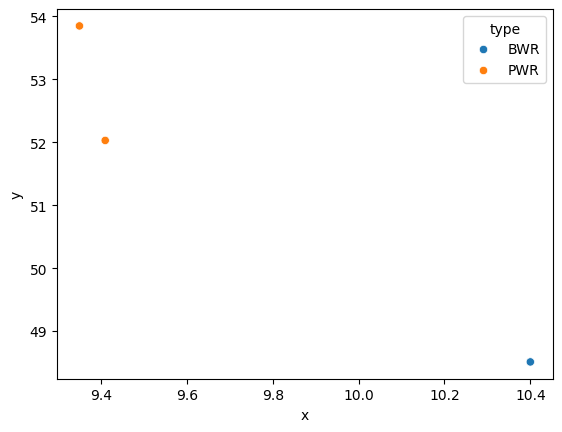

In [48]:
import seaborn as sns

sns.scatterplot(
    data = data,
    x = "x",
    y = "y",
    hue = "type"
)

<Axes: xlabel='start_year', ylabel='capacity'>

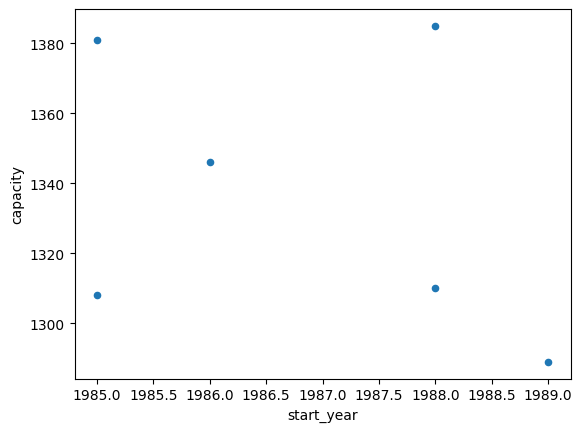

In [228]:
df.plot(kind="scatter", x="start_year", y="capacity")

In [ ]:
df.capacity.plot.barh(color="orange")

## Time Indexes

Indexes are very powerful. They are a big part of why Pandas is so useful. There are different indices for different types of data. Time Indexes are especially great when handling time-dependent data.

In [49]:
time = pd.date_range(start="2021-01-01", end="2023-01-01", freq="D")
time

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10',
               ...
               '2022-12-23', '2022-12-24', '2022-12-25', '2022-12-26',
               '2022-12-27', '2022-12-28', '2022-12-29', '2022-12-30',
               '2022-12-31', '2023-01-01'],
              dtype='datetime64[ns]', length=731, freq='D')

In [52]:
time.dayofyear

Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
       ...
       357, 358, 359, 360, 361, 362, 363, 364, 365,   1],
      dtype='int32', length=731)

In [50]:
values = np.sin(2 * np.pi * time.dayofyear / 365)
values

Index([ 0.017213356155834685,   0.03442161162274574,  0.051619667223253764,
         0.06880242680231986,   0.08596479873744647,   0.10310169744743485,
          0.1202080448993527,   0.13727877211326478,   0.15430882066428117,
          0.1712931441814776,
       ...
        -0.13727877211326517,  -0.12020804489935275,  -0.10310169744743544,
         -0.0859647987374467,  -0.06880242680232064,  -0.05161966722325418,
       -0.034421611622745804,  -0.01721335615583528, 6.432490598706546e-16,
        0.017213356155834685],
      dtype='float64', length=731)

In [53]:
ts = pd.Series(values, index=time)

In [54]:
ts

2021-01-01    1.721336e-02
2021-01-02    3.442161e-02
2021-01-03    5.161967e-02
2021-01-04    6.880243e-02
2021-01-05    8.596480e-02
                  ...     
2022-12-28   -5.161967e-02
2022-12-29   -3.442161e-02
2022-12-30   -1.721336e-02
2022-12-31    6.432491e-16
2023-01-01    1.721336e-02
Freq: D, Length: 731, dtype: float64

<Axes: >

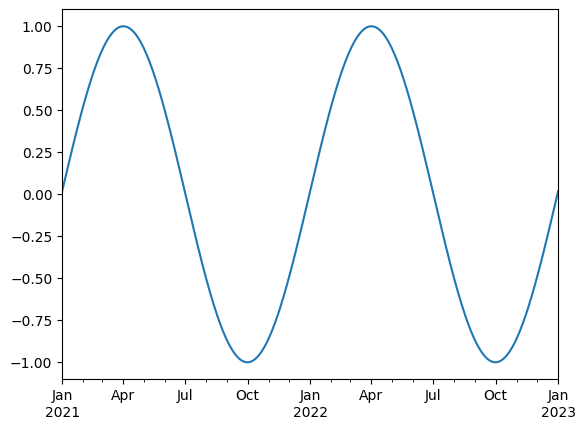

In [55]:
ts.plot()

We can use Python's _slicing_ notation inside `.loc` to select a date range.

<Axes: >

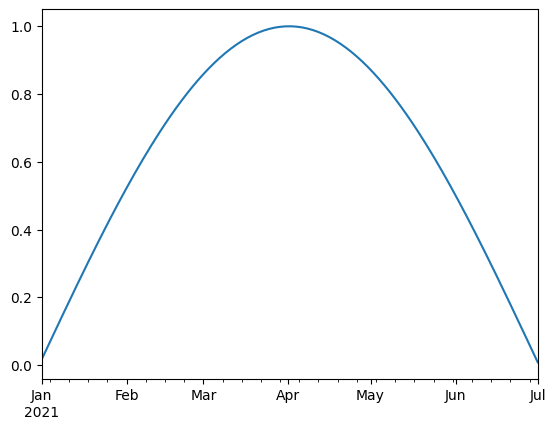

In [56]:
ts.loc["2021-01-01":"2021-07-01"].plot()

<Axes: >

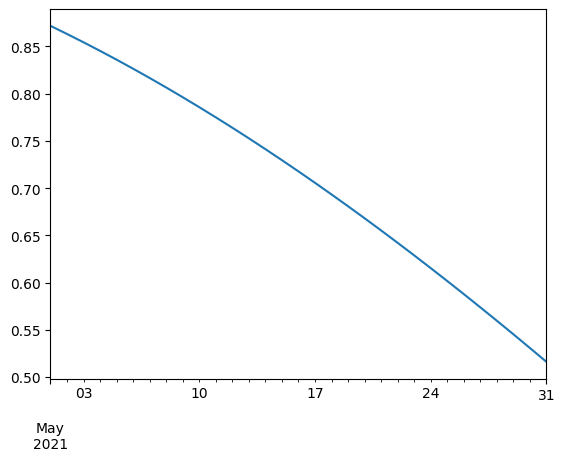

In [61]:
ts.loc["2021-05"].plot()

The `pd.TimeIndex` object has lots of useful attributes

In [62]:
ts.index.month

Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       ...
       12, 12, 12, 12, 12, 12, 12, 12, 12,  1],
      dtype='int32', length=731)

In [63]:
ts.index.day

Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
       ...
       23, 24, 25, 26, 27, 28, 29, 30, 31,  1],
      dtype='int32', length=731)

Another common operation is to change the resolution of a dataset by resampling in time. Pandas exposes this through the [resample](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#resampling) function. The resample periods are specified using pandas [offset index](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases) syntax.

Below we resample the dataset by taking the mean over each month.

In [65]:
ts.resample("M").mean()

2021-01-31    0.268746
2021-02-28    0.698782
2021-03-31    0.949778
2021-04-30    0.959332
2021-05-31    0.709200
2021-06-30    0.268949
2021-07-31   -0.244105
2021-08-31   -0.697250
2021-09-30   -0.955056
2021-10-31   -0.954333
2021-11-30   -0.697778
2021-12-31   -0.252337
2022-01-31    0.268746
2022-02-28    0.698782
2022-03-31    0.949778
2022-04-30    0.959332
2022-05-31    0.709200
2022-06-30    0.268949
2022-07-31   -0.244105
2022-08-31   -0.697250
2022-09-30   -0.955056
2022-10-31   -0.954333
2022-11-30   -0.697778
2022-12-31   -0.252337
2023-01-31    0.017213
Freq: M, dtype: float64

<Axes: >

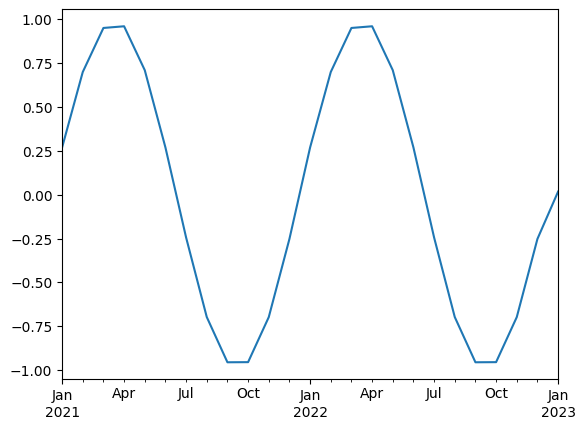

In [66]:
ts.resample("M").mean().plot()

## Reading and Writing Files

To read data into pandas, we can use for instance the [`pd.read_csv()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) function. This function is incredibly powerful and complex with a multitude of settings. You can use it to extract data from almost any text file.

The `pd.read_csv()` function can take a path to a local file as an input, or even a link to an online text file.

Let's import a slightly larger dataset about the power plant fleet in Europe_

In [3]:
fn = "https://raw.githubusercontent.com/PyPSA/powerplantmatching/master/powerplants.csv"

In [69]:
data

,capacity,type,start_year,end_year,x,y
0,1288,BWR,1985,2021,10.40,48.51
1,1360,PWR,1985,2021,9.41,52.03
2,1326,PWR,1986,2021,9.35,53.85


In [73]:
data.to_csv(
    "/Users/nicholasabad/Desktop/workspace/data-science-for-esm-private/some_random_datafile.csv",
    index=False
)

In [74]:
data_read_in = pd.read_csv("/Users/nicholasabad/Desktop/workspace/data-science-for-esm-private/some_random_datafile.csv")
data_read_in

,capacity,type,start_year,end_year,x,y
0,1288,BWR,1985,2021,10.40,48.51
1,1360,PWR,1985,2021,9.41,52.03
2,1326,PWR,1986,2021,9.35,53.85


In [4]:
df = pd.read_csv(fn, index_col=0)
df.iloc[:5, :10]

,Name,Fueltype,Technology,Set,Country,Capacity,Efficiency,DateIn,DateRetrofit,DateOut
id,,,,,,,,,,
0,Doel,Nuclear,Steam Turbine,PP,Belgium,2911.0,NaN,1975.0,NaN,2025.0
1,Pragneres,Hydro,Reservoir,Store,France,189.2,NaN,1953.0,NaN,NaN
2,Rhinau,Hydro,Run-Of-River,PP,France,152.0,NaN,1963.0,2016.0,NaN
3,Saint Chamas,Hydro,Reservoir,Store,France,159.0,NaN,1965.0,NaN,NaN
4,Saint Esteve,Hydro,Reservoir,Store,France,141.0,NaN,1963.0,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6279 entries, 0 to 6567
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 6279 non-null   object 
 1   Fueltype             6279 non-null   object 
 2   Technology           5624 non-null   object 
 3   Set                  6279 non-null   object 
 4   Country              6279 non-null   object 
 5   Capacity             6279 non-null   float64
 6   Efficiency           523 non-null    float64
 7   DateIn               4345 non-null   float64
 8   DateRetrofit         1855 non-null   float64
 9   DateOut              169 non-null    float64
 10  lat                  6279 non-null   float64
 11  lon                  6279 non-null   float64
 12  Duration             453 non-null    float64
 13  Volume_Mm3           6279 non-null   float64
 14  DamHeight_m          6279 non-null   float64
 15  StorageCapacity_MWh  6279 non-null   float6

In [9]:
df.describe()

,Capacity,Efficiency,DateIn,DateRetrofit,DateOut,lat,lon,Duration,Volume_Mm3,DamHeight_m,StorageCapacity_MWh
count,6279.000000,523.000000,4345.000000,1855.000000,169.000000,6279.000000,6279.000000,453.000000,6279.000000,6279.000000,6279.000000
mean,134.859949,0.487393,1981.334638,1984.904043,2027.171598,48.913630,7.870294,1198.921576,7.353734,4.999447,416.397834
std,374.901552,0.179273,98.830534,25.008638,8.853982,6.873412,9.095917,1602.640969,139.453384,47.628853,9337.663223
min,0.000000,0.187765,0.000000,1899.000000,2020.000000,32.742000,-17.055700,0.007907,0.000000,0.000000,0.000000
25%,9.450000,0.361350,1966.000000,1967.000000,2021.000000,43.462200,0.702997,33.854167,0.000000,0.000000,0.000000
50%,26.000000,0.390400,1995.000000,1991.000000,2024.000000,48.119746,8.586662,640.476190,0.000000,0.000000,0.000000
75%,82.746294,0.588751,2008.000000,2005.000000,2030.000000,52.435150,13.140173,1833.300000,0.000000,0.000000,0.000000
max,6000.000000,0.917460,2022.000000,2020.000000,2051.000000,70.689366,39.261917,16840.000000,9500.000000,1800.000000,421000.000000


Sometimes, we also want to store a DataFrame for later use. There are many different file formats tabular data can be stored in,  including HTML, JSON, Excel, Parquet, Feather, etc. Here, let's say we want to store the DataFrame as CSV (comma-separated values) file under the name "tmp.csv".

In [10]:
df.to_csv("tmp.csv")

## Groupby Functionality

Both `Series` and `DataFrame` objects have a `groupby` method. It accepts a variety of arguments, but the simplest way to think about it is that you pass another series, whose unique values are used to split the original object into different groups. `groupby` is an amazingly powerful but also complex function.

Here's an example which retrieves the total generation capacity per country.

In [76]:
df

,Name,Fueltype,Technology,Set,Country,Capacity,Efficiency,DateIn,DateRetrofit,DateOut,lat,lon,Duration,Volume_Mm3,DamHeight_m,StorageCapacity_MWh,EIC,projectID
id,,,,,,,,,,,,,,,,,,
0,Doel,Nuclear,Steam Turbine,PP,Belgium,2911.000000,NaN,1975.0,NaN,2025.0,51.32481,4.25889,NaN,0.0,0.0,0.0,"{'22WDOELX3000078D', '22WDOELX40000793', '22WD...","{'ENTSOE': {'22WDOELX3000078D', '22WDOELX40000..."
1,Pragneres,Hydro,Reservoir,Store,France,189.200000,NaN,1953.0,NaN,NaN,42.82110,0.01033,NaN,0.0,0.0,0.0,{'17W100P100P02918'},"{'ENTSOE': {'17W100P100P02918'}, 'OPSD': {'OEU..."
2,Rhinau,Hydro,Run-Of-River,PP,France,152.000000,NaN,1963.0,2016.0,NaN,48.28412,7.67728,NaN,0.0,0.0,0.0,{'17W100P100P0304P'},"{'ENTSOE': {'17W100P100P0304P'}, 'OPSD': {'OEU..."
3,Saint Chamas,Hydro,Reservoir,Store,France,159.000000,NaN,1965.0,NaN,NaN,43.52741,5.07342,NaN,0.0,0.0,0.0,{'17W100P100P0296Z'},"{'ENTSOE': {'17W100P100P0296Z'}, 'OPSD': {'OEU..."
4,Saint Esteve,Hydro,Reservoir,Store,France,141.000000,NaN,1963.0,NaN,NaN,43.69049,5.38489,NaN,0.0,0.0,0.0,{'17W100P100P0298V'},"{'ENTSOE': {'17W100P100P0298V'}, 'OPSD': {'OEU..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6563,Vitkovice,Hard Coal,NaN,PP,Czech Republic,0.000000,NaN,1970.0,NaN,2020.0,49.81600,18.27330,NaN,0.0,0.0,0.0,{nan},{'BEYONDCOAL': {'BEYOND-CZ-31'}}
6564,Wilhelmshaven New,Hard Coal,NaN,PP,Germany,732.939880,NaN,2015.0,NaN,NaN,53.57880,8.13270,NaN,0.0,0.0,0.0,{nan},{'BEYONDCOAL': {'BEYOND-DE-247'}}
6565,Zabrze,Hard Coal,NaN,PP,Poland,68.223335,NaN,1976.0,NaN,NaN,50.29920,18.81230,NaN,0.0,0.0,0.0,{nan},{'BEYONDCOAL': {'BEYOND-PL-237'}}


In [81]:
df.groupby("Country").agg(
    {
        "Capacity": "sum",
        "lat": "max",
        "lon": "count"
    }
)

,Capacity,lat,lon
Country,,,
Albania,1833.208275,42.251400,11
Austria,18308.520000,48.553600,190
Belgium,14963.055947,51.660000,79
Bosnia and Herzegovina,4038.500000,44.759289,21
Bulgaria,10307.086363,43.948363,46
Croatia,3678.621069,46.347900,26
Czech Republic,15406.603906,50.646200,59
Denmark,8773.526330,57.127900,36
Estonia,2193.000000,59.453100,11


In [78]:
grouped = df.groupby("Country").Capacity.sum()
grouped

Country
Albania                    166.655298
Austria                     96.360632
Belgium                    189.405771
Bosnia and Herzegovina     192.309524
Bulgaria                   224.067095
Croatia                    141.485426
Czech Republic             261.128880
Denmark                    243.709065
Estonia                    199.363636
Finland                     82.888313
France                     282.760815
Germany                     83.684750
Greece                     279.499780
Hungary                    210.219853
Ireland                    181.497564
Italy                      140.262123
Latvia                     515.020000
Lithuania                  323.142857
Luxembourg                1291.000000
Moldova                    638.462845
Montenegro                 172.960494
Netherlands                384.043308
Norway                      81.989886
Poland                     276.674814
Portugal                   113.627955
Romania                    128.048167
Serb

Such **“chaining”** operations together is very common with pandas:

Let's break apart this operation a bit. The workflow with `groupby` can be divided into three general steps:

1. **Split**: Partition the data into different groups based on some criterion.
1. **Apply**: Do some caclulation within each group. Different types of steps might be
   - *Aggregation*: Get the mean or max within the group.
   - *Transformation*: Normalize all the values within a group.
   - *Filtration*: Eliminate some groups based on a criterion.
1. **Combine**: Put the results back together into a single object.

<img src="https://miro.medium.com/max/1840/1*JbF6nhrQsn4f-TaSF6IR9g.png" width="720px" />

In [82]:
gb = df.groupby("Country")
gb

The length tells us how many groups were found:

In [83]:
len(gb)

34

All of the groups are available as a dictionary via the `.groups` attribute:

In [84]:
groups = gb.groups
len(groups)

34

In [85]:
list(groups.keys())[:5]

['Albania', 'Austria', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria']

Now that we know how to create a `GroupBy` object, let's learn how to do aggregation on it.

In [86]:
gb.Capacity.sum()

Country
Albania                     1833.208275
Austria                    18308.520000
Belgium                    14963.055947
Bosnia and Herzegovina      4038.500000
Bulgaria                   10307.086363
Croatia                     3678.621069
Czech Republic             15406.603906
Denmark                     8773.526330
Estonia                     2193.000000
Finland                    17738.099044
France                     99814.567520
Germany                   104103.829396
Greece                     13136.489662
Hungary                     5886.155890
Ireland                     7985.892834
Italy                      82333.866461
Latvia                      2575.100000
Lithuania                   2262.000000
Luxembourg                  2582.000000
Moldova                     1915.388535
Montenegro                   864.802472
Netherlands                22658.555180
Norway                     31484.116100
Poland                     35691.050966
Portugal                   17725

In [88]:
gb.Capacity.sum().nsmallest(10)

Country
Montenegro                 864.802472
Albania                   1833.208275
Moldova                   1915.388535
Estonia                   2193.000000
Lithuania                 2262.000000
Latvia                    2575.100000
Luxembourg                2582.000000
Slovenia                  3473.437366
Croatia                   3678.621069
Bosnia and Herzegovina    4038.500000
Name: Capacity, dtype: float64

In [93]:
df.groupby("Country").agg(
    {
        "Capacity": "sum",
        "lat": "max",
        "lon": "count"
    }
).nsmallest(5, "lon")

,Capacity,lat,lon
Country,,,
Luxembourg,2582.000000,49.951567,2
Moldova,1915.388535,47.277800,3
Latvia,2575.100000,56.990400,5
Montenegro,864.802472,43.358164,5
Lithuania,2262.000000,56.093133,7


In [17]:
gb["DateIn"].mean().head()

Country
Albania                   1981.000000
Austria                   1972.195804
Belgium                   1992.607143
Bosnia and Herzegovina    1979.809524
Bulgaria                  1977.833333
Name: DateIn, dtype: float64

In [97]:
df.head()

,Name,Fueltype,Technology,Set,Country,Capacity,Efficiency,DateIn,DateRetrofit,DateOut,lat,lon,Duration,Volume_Mm3,DamHeight_m,StorageCapacity_MWh,EIC,projectID
id,,,,,,,,,,,,,,,,,,
0,Doel,Nuclear,Steam Turbine,PP,Belgium,2911.0,NaN,1975.0,NaN,2025.0,51.32481,4.25889,NaN,0.0,0.0,0.0,"{'22WDOELX3000078D', '22WDOELX40000793', '22WD...","{'ENTSOE': {'22WDOELX3000078D', '22WDOELX40000..."
1,Pragneres,Hydro,Reservoir,Store,France,189.2,NaN,1953.0,NaN,NaN,42.82110,0.01033,NaN,0.0,0.0,0.0,{'17W100P100P02918'},"{'ENTSOE': {'17W100P100P02918'}, 'OPSD': {'OEU..."
2,Rhinau,Hydro,Run-Of-River,PP,France,152.0,NaN,1963.0,2016.0,NaN,48.28412,7.67728,NaN,0.0,0.0,0.0,{'17W100P100P0304P'},"{'ENTSOE': {'17W100P100P0304P'}, 'OPSD': {'OEU..."
3,Saint Chamas,Hydro,Reservoir,Store,France,159.0,NaN,1965.0,NaN,NaN,43.52741,5.07342,NaN,0.0,0.0,0.0,{'17W100P100P0296Z'},"{'ENTSOE': {'17W100P100P0296Z'}, 'OPSD': {'OEU..."
4,Saint Esteve,Hydro,Reservoir,Store,France,141.0,NaN,1963.0,NaN,NaN,43.69049,5.38489,NaN,0.0,0.0,0.0,{'17W100P100P0298V'},"{'ENTSOE': {'17W100P100P0298V'}, 'OPSD': {'OEU..."


In [96]:
df.value_counts("Fueltype")

Fueltype
Hydro          3306
Wind           1235
Natural Gas     595
Solar           364
Hard Coal       219
Bioenergy       117
Lignite         113
Waste           101
Oil              95
Nuclear          56
Other            54
Geothermal       24
Name: count, dtype: int64

In [98]:
df.value_counts(["Fueltype", "Technology"])

Fueltype     Technology            
Hydro        Run-Of-River              1900
             Reservoir                 1086
Wind         Onshore                   1061
Natural Gas  CCGT                       428
Solar        Pv                         186
Hard Coal    Steam Turbine              174
Hydro        Pumped Storage             159
Natural Gas  Steam Turbine              146
Lignite      Steam Turbine               94
Bioenergy    Steam Turbine               68
Waste        Steam Turbine               67
Nuclear      Steam Turbine               55
Oil          Steam Turbine               53
Wind         Offshore                    34
             Offshore Hard Mount         26
Other        Steam Turbine               20
Hydro        Unknown                     13
Hard Coal    CCGT                        12
Other        Csp                         12
Geothermal   Steam Turbine                6
Wind         Offshore Mount Unknown       5
Natural Gas  Combustion Engine          

Grouping is not only possible on a single columns, but also on multiple columns. For instance,
we might want to group the capacities by country **and** fuel type. To achieve this, we pass a list of functions to the `groupby` functions.

In [99]:
capacities = df.groupby(["Country", "Fueltype"]).Capacity.sum()
capacities

Country         Fueltype   
Albania         Hydro           1743.353732
                Oil               89.854543
Austria         Hard Coal        578.400000
                Hydro          13100.420000
                Natural Gas     4553.700000
                                   ...     
United Kingdom  Oil              100.000000
                Other             55.000000
                Solar           2077.000000
                Waste            498.900000
                Wind           21650.000000
Name: Capacity, Length: 189, dtype: float64

In [106]:
country_and_fueltype = df.groupby(["Country", "Fueltype"]).agg(
    {
        "Capacity": "sum"
    }
)

# Find a way to get multiple aggregates (i.e. sum, mean, count) in the same df.

In [107]:
country_and_fueltype

Capacity
Country        Fueltype                 
Albania        Hydro         1743.353732
               Oil             89.854543
Austria        Hard Coal      578.400000
               Hydro        13100.420000
               Natural Gas   4553.700000
...                                  ...
United Kingdom Oil            100.000000
               Other           55.000000
               Solar         2077.000000
               Waste          498.900000
               Wind         21650.000000

[189 rows x 1 columns]

In [110]:
country_and_fueltype.index.get_level_values("Country")

Index(['Albania', 'Albania', 'Austria', 'Austria', 'Austria', 'Austria',
       'Belgium', 'Belgium', 'Belgium', 'Belgium',
       ...
       'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom',
       'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom',
       'United Kingdom', 'United Kingdom'],
      dtype='object', name='Country', length=189)

By grouping by multiple attributes, our index becomes a `pd.MultiIndex` (a hierarchical index with multiple *levels*.

In [19]:
capacities.index[:5]

MultiIndex([('Albania',       'Hydro'),
            ('Albania',         'Oil'),
            ('Austria',   'Hard Coal'),
            ('Austria',       'Hydro'),
            ('Austria', 'Natural Gas')],
           names=['Country', 'Fueltype'])

In [24]:
# To just get a single index... 
capacities.index[:5].get_level_values("Country")

Index(['Albania', 'Albania', 'Austria', 'Austria', 'Austria'], dtype='object', name='Country')

In [111]:
type(capacities.index)

pandas.core.indexes.multi.MultiIndex

We can use the `.unstack` function to reshape the multi-indexed `pd.Series` into a `pd.DataFrame` which has the second index level as columns. 

In [112]:
capacities

Country         Fueltype   
Albania         Hydro           1743.353732
                Oil               89.854543
Austria         Hard Coal        578.400000
                Hydro          13100.420000
                Natural Gas     4553.700000
                                   ...     
United Kingdom  Oil              100.000000
                Other             55.000000
                Solar           2077.000000
                Waste            498.900000
                Wind           21650.000000
Name: Capacity, Length: 189, dtype: float64

In [115]:
capacities_unstacked = capacities.unstack().T

In [118]:
capacities_unstacked.fillna(int(0))

Country,Albania,Austria,Belgium,Bosnia and Herzegovina,Bulgaria,Croatia,Czech Republic,Denmark,Estonia,Finland,...,Portugal,Romania,Serbia,Slovakia,Slovenia,Spain,Sweden,Switzerland,Ukraine,United Kingdom
Fueltype,,,,,,,,,,,,,,,,,,,,,
Bioenergy,0.000000,0.00,363.000000,0.0,0.000000,0.000000,0.000000,1009.00000,0.0,3300.940000,...,30.000000,0.000000,0.000000,0.000000,0.000000,20.000000,220.000000,0.00,0.0,589.300000
Geothermal,0.000000,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.000000
Hard Coal,0.000000,578.40,512.596948,0.0,649.191813,308.848880,1060.227500,3541.82633,0.0,2312.609044,...,1808.761004,1184.688989,0.000000,263.673970,114.320183,8474.678478,141.000000,0.00,25817.0,16461.890974
Hydro,1743.353732,13100.42,1400.658999,2054.5,2899.540000,2541.772189,1868.210285,0.00000,0.0,3181.050000,...,7772.200000,7977.390000,3112.500000,2429.683000,1223.695000,26080.361248,13979.686625,19401.73,6346.0,9735.700000
Lignite,0.000000,0.00,0.000000,1984.0,4117.354550,0.000000,7072.266121,0.00000,0.0,965.000000,...,0.000000,3384.253348,6347.415458,317.863362,1005.422184,1355.400000,0.000000,0.00,0.0,0.000000
Natural Gas,0.000000,4553.70,5083.300000,0.0,420.000000,828.000000,986.900000,1248.20000,173.0,1911.800000,...,3872.000000,3545.000000,365.000000,728.000000,434.000000,24333.532000,1091.000000,0.00,1290.0,34400.422432
Nuclear,0.000000,0.00,5919.000000,0.0,2080.000000,0.000000,4290.000000,0.00000,0.0,4362.000000,...,0.000000,1300.000000,0.000000,1940.000000,696.000000,7117.200000,8617.000000,3348.00,13835.0,11239.000000
Oil,89.854543,0.00,163.600000,0.0,0.000000,0.000000,0.000000,664.00000,1841.0,1289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1901.271000,1685.000000,0.00,0.0,100.000000
Other,0.000000,0.00,0.000000,0.0,0.000000,0.000000,0.000000,160.00000,0.0,222.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1008.409314,0.000000,0.00,0.0,55.000000


In [121]:
capacities_unstacked

Country,Albania,Austria,Belgium,Bosnia and Herzegovina,Bulgaria,Croatia,Czech Republic,Denmark,Estonia,Finland,...,Portugal,Romania,Serbia,Slovakia,Slovenia,Spain,Sweden,Switzerland,Ukraine,United Kingdom
Fueltype,,,,,,,,,,,,,,,,,,,,,
Bioenergy,NaN,NaN,363.000000,NaN,NaN,NaN,NaN,1009.00000,NaN,3300.940000,...,30.000000,NaN,NaN,NaN,NaN,20.000000,220.000000,NaN,NaN,589.300000
Geothermal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hard Coal,NaN,578.40,512.596948,NaN,649.191813,308.848880,1060.227500,3541.82633,NaN,2312.609044,...,1808.761004,1184.688989,NaN,263.673970,114.320183,8474.678478,141.000000,NaN,25817.0,16461.890974
Hydro,1743.353732,13100.42,1400.658999,2054.5,2899.540000,2541.772189,1868.210285,NaN,NaN,3181.050000,...,7772.200000,7977.390000,3112.500000,2429.683000,1223.695000,26080.361248,13979.686625,19401.73,6346.0,9735.700000
Lignite,NaN,NaN,NaN,1984.0,4117.354550,NaN,7072.266121,NaN,NaN,965.000000,...,NaN,3384.253348,6347.415458,317.863362,1005.422184,1355.400000,NaN,NaN,NaN,NaN
Natural Gas,NaN,4553.70,5083.300000,NaN,420.000000,828.000000,986.900000,1248.20000,173.0,1911.800000,...,3872.000000,3545.000000,365.000000,728.000000,434.000000,24333.532000,1091.000000,NaN,1290.0,34400.422432
Nuclear,NaN,NaN,5919.000000,NaN,2080.000000,NaN,4290.000000,NaN,NaN,4362.000000,...,NaN,1300.000000,NaN,1940.000000,696.000000,7117.200000,8617.000000,3348.00,13835.0,11239.000000
Oil,89.854543,NaN,163.600000,NaN,NaN,NaN,NaN,664.00000,1841.0,1289.000000,...,NaN,NaN,NaN,NaN,NaN,1901.271000,1685.000000,NaN,NaN,100.000000
Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160.00000,NaN,222.100000,...,NaN,NaN,NaN,NaN,NaN,1008.409314,NaN,NaN,NaN,55.000000


In [124]:
np.round(capacities_unstacked, 2).fillna(0)

Country,Albania,Austria,Belgium,Bosnia and Herzegovina,Bulgaria,Croatia,Czech Republic,Denmark,Estonia,Finland,...,Portugal,Romania,Serbia,Slovakia,Slovenia,Spain,Sweden,Switzerland,Ukraine,United Kingdom
Fueltype,,,,,,,,,,,,,,,,,,,,,
Bioenergy,0.00,0.00,363.00,0.0,0.00,0.00,0.00,1009.00,0.0,3300.94,...,30.00,0.00,0.00,0.00,0.00,20.00,220.00,0.00,0.0,589.30
Geothermal,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00
Hard Coal,0.00,578.40,512.60,0.0,649.19,308.85,1060.23,3541.83,0.0,2312.61,...,1808.76,1184.69,0.00,263.67,114.32,8474.68,141.00,0.00,25817.0,16461.89
Hydro,1743.35,13100.42,1400.66,2054.5,2899.54,2541.77,1868.21,0.00,0.0,3181.05,...,7772.20,7977.39,3112.50,2429.68,1223.70,26080.36,13979.69,19401.73,6346.0,9735.70
Lignite,0.00,0.00,0.00,1984.0,4117.35,0.00,7072.27,0.00,0.0,965.00,...,0.00,3384.25,6347.42,317.86,1005.42,1355.40,0.00,0.00,0.0,0.00
Natural Gas,0.00,4553.70,5083.30,0.0,420.00,828.00,986.90,1248.20,173.0,1911.80,...,3872.00,3545.00,365.00,728.00,434.00,24333.53,1091.00,0.00,1290.0,34400.42
Nuclear,0.00,0.00,5919.00,0.0,2080.00,0.00,4290.00,0.00,0.0,4362.00,...,0.00,1300.00,0.00,1940.00,696.00,7117.20,8617.00,3348.00,13835.0,11239.00
Oil,89.85,0.00,163.60,0.0,0.00,0.00,0.00,664.00,1841.0,1289.00,...,0.00,0.00,0.00,0.00,0.00,1901.27,1685.00,0.00,0.0,100.00
Other,0.00,0.00,0.00,0.0,0.00,0.00,0.00,160.00,0.0,222.10,...,0.00,0.00,0.00,0.00,0.00,1008.41,0.00,0.00,0.0,55.00


## Exercises

### Power Plants Data

Run the function `.describe()` on the DataFrame that includes the power plant database:

In [ ]:
df.describe()

Provide a list of unique fuel types included in the dataset

In [ ]:
df.Fueltype.unique()

Provide a list of unique technologies included in the dataset

In [ ]:
df.Technology.unique()

Filter the dataset by power plants with the fuel type "Hard Coal"

In [ ]:
coal = df.loc[df.Fueltype == "Hard Coal"]
coal

Identify the 5 largest coal power plants. In which countries are they located? When were they built?

In [ ]:
coal.loc[coal.Capacity.nlargest(5).index]

Identify the power plant with the longest "Name".

In [ ]:
i = df.Name.map(lambda x: len(x)).argmax()
df.iloc[i]

Identify the 10 northernmost powerplants. What type of power plants are they?

In [ ]:
index = df.lat.nlargest(10).index
df.loc[index]

What is the average "DateIn" of each "Fueltype"? Which type of power plants is the oldest on average?

In [ ]:
df.groupby("Fueltype").DateIn.mean().sort_values()

Plot a histogram of power plant capacities with bins of length 100 MW between 0 and 4000 MW. What do you observe?

In [ ]:
df.Capacity.plot.hist(bins=np.arange(0, 4001, 100))

How many power plants of each fuel type are there in each country? Display the results in a DataFrame with countries as index and fuel type as columns. Fill missing values with the value zero. Convert all values to integers.

> Browse Google or the pandas documentation to find the right aggregation function to count values.

In [26]:
df.groupby(["Country", "Fueltype"]).size().unstack().fillna(0.0).astype(int)

Fueltype,Bioenergy,Geothermal,Hard Coal,Hydro,Lignite,Natural Gas,Nuclear,Oil,Other,Solar,Waste,Wind
Country,,,,,,,,,,,,
Albania,0,0,0,10,0,0,0,1,0,0,0,0
Austria,0,0,2,172,0,12,0,0,0,0,0,4
Belgium,2,0,1,13,0,25,2,9,0,1,8,18
Bosnia and Herzegovina,0,0,0,16,5,0,0,0,0,0,0,0
Bulgaria,0,0,3,30,8,1,1,0,0,3,0,0
Croatia,0,0,1,21,0,4,0,0,0,0,0,0
Czech Republic,0,0,9,14,26,4,2,0,0,3,0,1
Denmark,4,0,9,0,0,4,0,1,2,3,0,13
Estonia,0,0,0,0,0,1,0,2,0,0,0,8


### Time Series Analysis

Read in the time series from the second lecture into a DataFrame.

The file is available at https://tubcloud.tu-berlin.de/s/pKttFadrbTKSJKF/download/time-series-lecture-2.csv. and includes hourly time series for Germany in 2015 for:
    
1. electricity demand from [OPSD](https://open-power-system-data.org/) in GW
2. onshore wind capacity factors from [renewables.ninja](https://www.renewables.ninja/) in per-unit of installed capacity
3. offshore wind capacity factors from [renewables.ninja](https://www.renewables.ninja/) in per-unit of installed capacity
4. solar PV capacity factors from [renewables.ninja](https://www.renewables.ninja/) in per-unit of installed capacity
5. electricity day-ahead spot market prices in €/MWh from EPEX Spot zone DE/AT/LU retrieved via [SMARD platform](https://www.smard.de/home)

Use the function `pd.read_csv` with the keyword arguments `index_col=` and `parse_dates=` to ensure the
time stamps are treated as `pd.DatetimeIndex`.

In [ ]:
# your code here

The start of the DataFrame should look like this:

|                     |   load |   onwind |   offwind |   solar |   prices |
|:--------------------|-------:|---------:|----------:|--------:|---------:|
| 2015-01-01 00:00:00 | 41.151 |   0.1566 |    0.703  |       0 |      nan |
| 2015-01-01 01:00:00 | 40.135 |   0.1659 |    0.6875 |       0 |      nan |
| 2015-01-01 02:00:00 | 39.106 |   0.1746 |    0.6535 |       0 |      nan |
| 2015-01-01 03:00:00 | 38.765 |   0.1745 |    0.6803 |       0 |      nan |
| 2015-01-01 04:00:00 | 38.941 |   0.1826 |    0.7272 |       0 |      nan |

And it should pass the following test:

`assert type(df.index) == pd.DatetimeIndex`

For each column:
- What are the average, minimum and maximum values?
- Find the time stamps where data on prices is missing.
- Fill up the missing data with the prices observed one week ahead.
- Plot the time series for the full year.
- Plot the time series for the month May.
- Resample the time series to daily, weeky, and monthly frequencies and plot the resulting time series in one graph.
- Sort the values in descending order and plot the duration curve. *Hint: Run `.reset_index(drop=True)` to drop the index after sorting.*
- Plot a histogram of the time series values.
- Perform a Fourier transformation of the time series. What are the dominant frequencies? *Hint: Below you can find an example how Fourier transformation can be down with `numpy`.*
- Calculate the Pearson correlation coefficients between all time series. *Hint: There is a function for that. Google for "pandas dataframe correlation".*

`abs(pd.Series(np.fft.rfft(df.solar - df.solar.mean()), index=np.fft.rfftfreq(len(df.solar), d=1./8760))**2)`

In [6]:
import seaborn as sns
from matplotlib import pyplot as plt

In [7]:
df

,Name,Fueltype,Technology,Set,Country,Capacity,Efficiency,DateIn,DateRetrofit,DateOut,lat,lon,Duration,Volume_Mm3,DamHeight_m,StorageCapacity_MWh,EIC,projectID
id,,,,,,,,,,,,,,,,,,
0,Doel,Nuclear,Steam Turbine,PP,Belgium,2911.000000,NaN,1975.0,NaN,2025.0,51.32481,4.25889,NaN,0.0,0.0,0.0,"{'22WDOELX3000078D', '22WDOELX40000793', '22WD...","{'ENTSOE': {'22WDOELX3000078D', '22WDOELX40000..."
1,Pragneres,Hydro,Reservoir,Store,France,189.200000,NaN,1953.0,NaN,NaN,42.82110,0.01033,NaN,0.0,0.0,0.0,{'17W100P100P02918'},"{'ENTSOE': {'17W100P100P02918'}, 'OPSD': {'OEU..."
2,Rhinau,Hydro,Run-Of-River,PP,France,152.000000,NaN,1963.0,2016.0,NaN,48.28412,7.67728,NaN,0.0,0.0,0.0,{'17W100P100P0304P'},"{'ENTSOE': {'17W100P100P0304P'}, 'OPSD': {'OEU..."
3,Saint Chamas,Hydro,Reservoir,Store,France,159.000000,NaN,1965.0,NaN,NaN,43.52741,5.07342,NaN,0.0,0.0,0.0,{'17W100P100P0296Z'},"{'ENTSOE': {'17W100P100P0296Z'}, 'OPSD': {'OEU..."
4,Saint Esteve,Hydro,Reservoir,Store,France,141.000000,NaN,1963.0,NaN,NaN,43.69049,5.38489,NaN,0.0,0.0,0.0,{'17W100P100P0298V'},"{'ENTSOE': {'17W100P100P0298V'}, 'OPSD': {'OEU..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6563,Vitkovice,Hard Coal,NaN,PP,Czech Republic,0.000000,NaN,1970.0,NaN,2020.0,49.81600,18.27330,NaN,0.0,0.0,0.0,{nan},{'BEYONDCOAL': {'BEYOND-CZ-31'}}
6564,Wilhelmshaven New,Hard Coal,NaN,PP,Germany,732.939880,NaN,2015.0,NaN,NaN,53.57880,8.13270,NaN,0.0,0.0,0.0,{nan},{'BEYONDCOAL': {'BEYOND-DE-247'}}
6565,Zabrze,Hard Coal,NaN,PP,Poland,68.223335,NaN,1976.0,NaN,NaN,50.29920,18.81230,NaN,0.0,0.0,0.0,{nan},{'BEYONDCOAL': {'BEYOND-PL-237'}}


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6279 entries, 0 to 6567
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 6279 non-null   object 
 1   Fueltype             6279 non-null   object 
 2   Technology           5624 non-null   object 
 3   Set                  6279 non-null   object 
 4   Country              6279 non-null   object 
 5   Capacity             6279 non-null   float64
 6   Efficiency           523 non-null    float64
 7   DateIn               4345 non-null   float64
 8   DateRetrofit         1855 non-null   float64
 9   DateOut              169 non-null    float64
 10  lat                  6279 non-null   float64
 11  lon                  6279 non-null   float64
 12  Duration             453 non-null    float64
 13  Volume_Mm3           6279 non-null   float64
 14  DamHeight_m          6279 non-null   float64
 15  StorageCapacity_MWh  6279 non-null   float6

<Axes: xlabel='lat', ylabel='Count'>

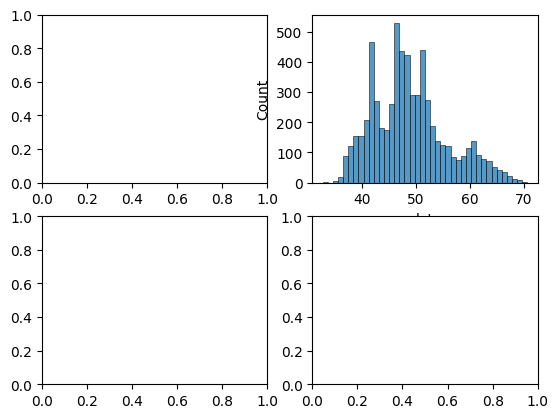

In [23]:
fig, ax = plt.subplots(ncols=2, nrows=2)

sns.histplot(data=df, x="lat", ax=ax[0, 1])
#

In [17]:
ax[1]

<Axes: >

In [ ]:
sns.histplot(data=df, x="lat", ax=ax)